In [ ]:
# Fetch utils directory from GitHub repo (workaround for using the utils in colab)
!curl -sL https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/archive/refs/heads/main.zip -o repo.zip
!unzip -q repo.zip "nextgen25-mlai-workshop01-main/utils/*" -d .
!rm -rf ./utils
!mv nextgen25-mlai-workshop01-main/utils ./utils -f
!rm -rf nextgen25-mlai-workshop01-main repo.zip

<h1>
    🤖 MLAI Workshop #01
</h1>

Across many machine learning courses and tutorials, I've found the focus is often on using a specific architecture, implementing a certain model, or using a given pipeline - and this is useful. But I find its much less common for those resources to step back and ask:
- What is does a model represent?
- What does it mean to learn from data?
- Why does this work — and when does it fail?
 
The goal of this series of workshops isn’t just to show you how to use machine learning models - it's to explore these questions - to facilitate develop a deeper understanding of the fundamentals that underpin how and why machine learning works.

💬 *Question for the audience! Who here works with machine learning regularly and who is new to this space?*

<h2>
    🗓️ Agenda
</h2>

1. **What are functions?**
    Understand functions as the foundation of machine learning — mappings from input to output that describe real-world processes.

2. **How do we represent functions?**
    Explore the idea of a **hypothesis space** and how different model structures (linear, nonlinear, polynomial) encode assumptions about the functions we can learn. We'll work through examples to visualize how different choices affect what we can represent.

3. **How do we calibrate the function?**
    Learn how we use **data** to constrain our models. We'll look at observations as evidence and introduce the concept of a loss function to quantify how well a model matches the data.

4. **What does the loss landscape look like?**
    Viewing the loss function as a landscape — we can visualize how different parameter choices influence model performance. We’ll use 2D and 3D plots to understand how gradient descent searches for good solutions.

5. **How do we navigate through the loss landscape?**
    We can explore this loss landscape using optimization techniques - allowing us to iteratively refine the parameters of our model.

---

<h2>
    Section 1: Functions
</h2>

<h3>
    📈 Section 1A: What are functions and why should I care?
</h3>

Functions describe the world - from physical phenomena such as the dynamics of protein folding and the behavior of fluids, to abstract processes like decision-making and natural language understanding - functions describe the world through relationships between inputs and outputs.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Forecast.jpg" height="400"/>
    <p><em>Figure 1. GraphCast is a Google DeepModel model for faster and more accurate global weather forecasting.</em></p>
</div>

So what is a function? A function $f$ is an object that maps an input space $\mathcal{X}$ to an output space $\mathcal{Y}$:

\begin{align*}
f: \mathcal{X} \to \mathcal{Y} \tag{1.1}\\
\end{align*}

For example, the linear equation $f(x) = \theta_{1} x + \theta_{2}$ is a function that maps a given input $x \in \mathbb{R}$ in 1-D space to an output $y \in \mathbb{R}$ in 1-D space.

In [1]:
# define some function
def f(x):
    return -7.13 * x + 0.51

# map the input to the output
x = 1.5
y = f(x)

print(f"f: {x:.2f} -> {y:.2f}")

f: 1.50 -> -10.19


However, functions can be more general than this. Consider weather forecasting, the evolution of the atmosphere could be considered a function i.e. there is a relationship between the current state and the future state.

\begin{align*}
    f^{*}: \mathcal{X}^{*} \to \mathcal{Y}^{*} \tag{1.2} \\
\end{align*}

where:
- $f^{*}$ represents the target function describing this relationship. (this may be a space of functions $\mathcal{T}$)
- $\mathcal{X}^{*}$ represents the true current and/or historical atmospheric state.
- $\mathcal{Y}^{*}$ represents the true corresponding future atmospheric state.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Rollout.jpg" height="400"/>
    <p><em>Figure 2. GraphCast takes as input the current atmospheric state and predicts the next state, this can be rolled out in an auto-regressive manner.</em></p>
</div>

The target function $f^{*}$ represents this true data generating process in its entirity. For example, the evolution of the atmosphere is governed by the laws of physics and encapsulates the physics of the system - from large-scale fluid dynamics to fine-grained thermodynamics. We often can't write down or compute $f^{*}$ directly, but we assume it exists and is responsible for generating the data we observe. 

💬 *Question for the audience! What sort of function/relationship are you assuming exists in your research? What are the inputs/predictors and what are the outputs/responses?

<h3>
    📌 Section 1B. Can we represent this function?
</h3>

Unfortunately, in most scenarios we don't have access to $f^{*}$ - if we did, we wouldn't be here today talking about machine learning. Instead, we often aim to approximate $f^{*}$ using our function $f$:

\begin{align*}
    f \approx f^{*} \tag{1.3}\\
\end{align*}

We might also place constrains on how well we approximate $f \approx f^{*}$, such that it can be useful in certain scenarios. We call this set of functions the target space $\mathcal{T}$:

\begin{align*}
    \mathcal{T} = \left\{ f \in \mathcal{H} \,|\, \mathcal{L}(f, f^{*}) \leq \epsilon \text{ and f satisfies additional constraints} \right\} \tag{1.4}
\end{align*}

where:
- $\mathcal{H}$ is the hypothesis space
- $\mathcal{L}(f, f^{*})$ is some function that evaluates the fit of the model
- $\epsilon$ is some evaluation metric threshold

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Error.png" height="400"/>
    <p><em>Figure 3. GraphCast error distribution on a 12-hour forecast visualized across on mercator projection.</em></p>
</div>

For the example of weather forecasting, you might consider $\mathcal{T}$ as the set of solutions that forecasts to a specified degree of accuracy after a 12-hour rollout $\mathcal{L}_{\text{forecast}}(f, f^{*}) \leq \epsilon$. To visialize this set of solutions we're going to use [Miro](https://miro.com/app/board/uXjVI44Nizk=/?share_link_id=794264052796).

In [2]:
# we might have a target function
def f_target(x):
    return ...

# we might have an approximation
def f_approx(x):
    return ...

# compute the distance in function or data space
def loss(f_target, f_approx):
    return ...

# suitable function has distance < threshold
eps = ...
is_suitable = loss(..., ...) < eps

TypeError: '<' not supported between instances of 'ellipsis' and 'ellipsis'

<h4>
    🤔 Hypothesis Space
</h4>

When we represent our function $f$ we usually separate this into it's structure and the parameterization. The hypothesis space $\mathcal{H}$ defines the structure of the functions we're willing to consider for $f$ - i.e. what form we think the relationship has.

\begin{align*}
    \mathcal{H} = \left\{ f_{\theta}: \mathcal{X} \to \mathcal{Y} \,|\, f_{\theta} \text{ satisfies structural constraints} \right\} \subseteq \Theta \tag{1.5}
\end{align*}

where:
- $f_{\theta}: \mathcal{X} \rightarrow \mathcal{Y}$ represents a single function parameterized by parameters $\theta$
- $f_{\theta} \text{ satisfies structural constraints}$ represents our choice of modeling assumptions e.g. what sort of model we use
- $\Theta$ represents the parameter space

For example, we might have a modelling problem where we hypothesise some linear equation as a suitable solution, in this case we can define $\mathcal{H}$ as:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \theta_{1} x + \theta_{2} \right\}, \quad
    (\theta_{1}, \theta_{2}) \in \mathbb{R}^{2} \tag{1.6}
\end{align*}

In [3]:
# restrict the set of functions to this form
def H(a, b):
    def f(x): # <--- defines the structure of our function
        return a * x + b
    return f

# retireve a specific model from the hypothesis space
f = H(a=0, b=1)

<h4>
    🎛️ Parameter Space
</h4>

The parameter space $\Theta$ is the set of all possible functions arising from different configurations of the parameters $\theta \in \Theta$. 

\begin{align*}
    \Theta = \left\{ \theta \in \mathbb{R}^{p} \,|\, \theta \text{ satisfies model-specific constraints} \right\} \tag{1.7}
\end{align*}

where:
- $p$ is the number of parameters
- $\theta \text{ satisfies model-specific constraints}$ represents additional constraints we place on the space

The highlight the distinction between $\mathcal{H}$ and $\Theta$. There are lots of different functions we could define using a set of $\theta$, this set of functions is usually much larger than our $\mathcal{H}$. For example, we might use $(\theta_{1}, \theta_{2})$ to define a linear function:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \theta_{1} x + \theta_{2} \right\} \tag{1.8}
\end{align*}

But we could also use it to parameterize a logistic curve, even if this is not a part of $\mathcal{H}$:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \frac{1}{1 + \exp^{\theta_{1} (x - \theta_{2})}} \right\} \tag{1.9}
\end{align*}

In [4]:
import numpy as np

# a different hypothesis space with the same parameter space
def another_H(a, b):
    def f(x): # <-- 
        return 1 / (1 + np.exp(a * (x - b)))
    return f

We can also constrain the parameter space to restrict the models we can select from the hypothesis space. For example, we could define specific ranges of parameters for $\theta$ rather than any real number - this may be relevant if you have constraints on what a parameter represents e.g. strength of the linear relationship.

\begin{align*} 
    \theta_{1} \in [0, 1], \quad
    \theta_{2} \in \left\{ 1,2 \right\} \tag{1.10}
\end{align*}

In [5]:
# define a set of parameters to consider (doesn't have to be explicit)
a = [0, ..., 1]
b = ...

# define a hypothesis space with parameters constrained by parameter space
def H(a, b):
    assert a >= 0 and a <= 1, "a must be in range [0,1]" # <-- restricts the hypothesis space
    assert b in [1,2], "b must be in {1,2}"
    def f(x): # <--- use this form
        return a * x + b
    return f

# invalid model based on parameter space constraints
f = H(a=4.1, b=1)

AssertionError: a must be in range [0,1]

<h4>
    🧠 What does this mean for our approximation?
</h4>

The hypothesis space $\mathcal{H}$ describes the structure of the function and the parameter space $\Theta$ allows us to describe what functions we can draw from that space. 

In certain scenarios, we might be able to use prior knowledge to design the hypothesis space - this is particularly useful in domains like physics, biology, or chemistry, where principled foundations exist. For example, in weather forecasting we know that atmospheric dynamics are (at least partially) governed by well-established physical laws — such as the Navier–Stokes equations. This is completemented with approximations of more complex phenomena that we can't easily represent. This allows us to reduce our hypothesis space to a better set of guesses for the approximation.

\begin{align*}
    \mathcal{Y} = \mathcal{X}_{t+1} = \mathcal{X}_{t} + \Delta t \left[\underbrace{\mathcal{N}(\mathcal{X}_{t})}_{\text{Navier–Stokes dynamics}} + \underbrace{\mathbf{P}_\theta(...)}_{\text{Subgrid parameterizations}} \right]\tag{1.11}
\end{align*}

💬 *Question for the audience! What sort of assumptions do you have about your data that inform the structure of your approximation function?*

For example, we have some target function $f^{*}$ that represents a data generating process, it is defined as:

\begin{align*}
    f^*(x) = e^{-x^{2}} \cdot \sin(10.8 \pi x + 0.41), \quad \text{for } x \in [0, 1] \tag{2.1}
\end{align*}

We might have some prior knowledge that the generalized form of the function will have this form:

In [6]:
# define a candidate hypothesis space
def H(A, k, x_0, B, tau_0, phi_0, C, tau_1, phi_1, D):
    def f(x): # <--- use this form
        return A * np.exp(-k * (x - x_0)**2) * (B * np.sin(2 * np.pi * tau_0 + phi_0) + C * np.cos(2 * np.pi * tau_1 + phi_1)) + D
    return f

However, for a vast number of problems, we don't even know what form the function should take...
- What function describes a person’s reasoning process? 
- What function maps pixels in an image to its semantic meaning? 
- What function generates coherent video from a text prompt? 

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/Reasoning.png" height="400"/>
    <p><em>Figure 3. What is the function for someones reasoning process?</em></p>
</div>

In such scenarios, we cannot rely on prior knowledge to explicitly define or constrain the hypothesis space $\mathcal{H}$. The structure of $f^{*}$ is unknown — and likely inexpressible in closed-form. Instead, we turn to flexible, expressive models capable of approximating a wide range of functions. This is the motivator for architectures such as neural networks which we'll begin to explore in the next workshop.

This leads to a fundamental source of error in machine learning, approximation error $\epsilon_{approx}$. Approximation error represents the error between the best function we can express in the hypothesis space $f^{*}_{\mathcal{H}}$ and the target function $f^{*}$:

\begin{align*}
    f^{*}_{\mathcal{H}} = argmin_{f \in \mathcal{H}}\mathcal{L}(f,f^{*}) \tag{1.12}
\end{align*}

Thus, we want to design $\mathcal{H}$ such that it can express $f^{*}$ as closely as possible, ideally $\mathcal{H} \subseteq \mathcal{T}$.

💬 *Question for the audience! Does your task have an approximation error, can you perfectly represent your target function within your hypothesis space?*

---

<h2>
    📉 Section 2. How do we select the best parameters?
</h2>

So to summarize where we're at. 
1. We have some function $f^{*}$ we want to approximate.
2. We've design a set of functions $f_{\theta} \in \mathcal{H}$ we hypothesize may be suitable solutions which are parameterized by $\theta \in \Theta$.

Our next question is how do we select a parameterization $\theta \in \Theta$ and then determine whether this is suitable.

<h3>
    Section 2A. Selecting a model from the hypothesis space.
</h3>

Continuing to use our example function, we have some target function $f^{*}$ that represents a data generating process, it is defined as:

\begin{align*}
    f^*(x) = e^{-x^{2}} \cdot \sin(5.8 \pi x + 0.41), \quad \text{for } x \in [0, 1] \tag{2.1}
\end{align*}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'f(x)')

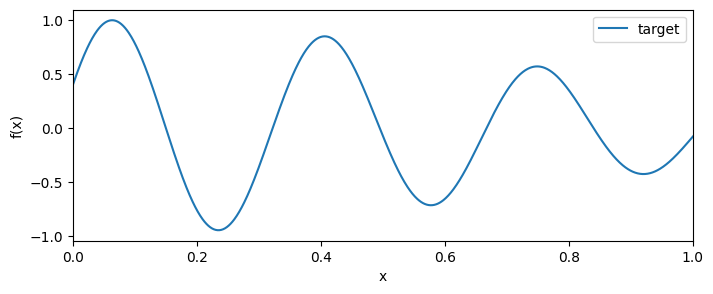

In [8]:
# target function
def f_target(x):
    return np.exp(-x**2) * np.sin(5.8 * np.pi * x + 0.41)

# suppose we can observe the target function perfectly (not just evaluate it)
N = 1000
x = np.linspace(0, 1, num=N)
y = f_target(x)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y, label="target")
ax.set_xlim(x.min(), x.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

Let's define a hypothesis space (the structure) of our function and select a single function from this space using a specific set of parameters.

Text(0, 0.5, 'f(x)')

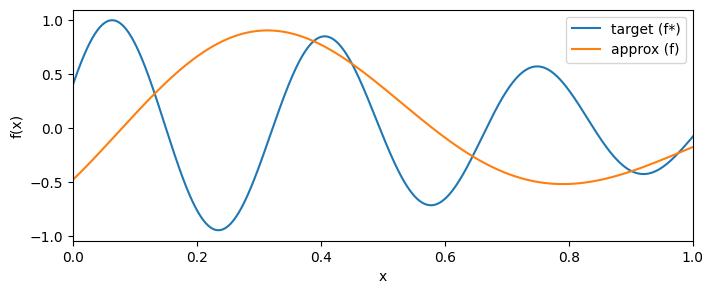

In [9]:
# your hypothesis space
def H(tau, phi):
    def f(x):
        return np.exp(-x**2) * np.sin(tau * np.pi * x + phi) # <-- TODO: this is probably a poor hypothesis - have a go at re-writing it
    return f

# select a function from this space
f_approx = H(tau=2, phi=-0.5) # <-- TODO: these is probably a poor parameterization - pick some better parameters

# make predictions
y_pred = f_approx(x)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y, label="target (f*)")
ax.plot(x, y_pred, label="approx (f)")
ax.set_xlim(x.min(), x.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

Obviously in this scenario we can perfectly observe the function and see it's form - in this scenario it's quite easy to select the right hypothesis space and then pick a good parameterization. Let's put this into a more realistic perspective.

<h3>
    🔍 Section 2B. Observing the Data Generating Processes
</h2>

While we may not known the function $f^{*}$, we can often observe its behaviour. That is, we can collect a set of data $\mathcal{D}$ generated by the processes governing this function - usually in the form of input/output pairs $(\mathcal{X}_{i}, \mathcal{Y}_{i})$:

\begin{align*}
    \mathcal{D} = \left\{ (\mathcal{X}_{i}, \mathcal{Y}_{i}) \right\}_{i=0}^{N} \tag{2.2}
\end{align*}

where:
- $\mathcal{X}_{i}$ represents an observation of the input.
- $\mathcal{Y}_{i}$ represents an observation of the output.

Observing both the input and output sides of a data generating process is often a messy, uncertain, and biased process — filled with various sources of noise, systematic errors, and missing information. For the example of weather forecasting, we might have to aggregate, process, and measurements from various sources - satellites, weather stations, aircraft - to try and get a sample of the "current state of the atmosphere".

- $\mathcal{X}_i$ represents the observed current or historical atmospheric state, assembled from multiple noisy sensors.
- $\mathcal{Y}_i$ represents the future state we hope to predict — often inferred from models, simulations, or delayed ground-truth verification.

Even with sophisticated tools, observations are rarely complete, consistent, or unbiased. Noise and bias in data don’t just affect accuracy — they shape what kind of function we’re able to learn. Understanding the imperfections in your data is just as important as designing your model.

💬 *Question for the audience!*
*1. What is your input data? How is it sampled? What errors exist in the measurement process?*
*2. What is your output data? How is it sampled? What errors exist in the measurement process?*

For example, we aim to observe our target function $f^{*}$, however there might be errors in where we measure $x + \epsilon_{x}$ and the observerations $y + \epsilon_{y}$.

\begin{align*}
    f^*(x) = e^{-x^{2}} \cdot \sin(5.8 \pi x + 0.41), \quad \text{for } x \in [0, 1] \tag{2.3}
\end{align*}

In [10]:
# perfect observation process
def observe_perfect(f, x):
    return f(x)

# for refernce
N = 1000
x = np.linspace(0, 1, num=N)
y = observe_perfect(f_target, x)

In [11]:
# noise observation process
def observe_noisy(f, x):
    # we often can't sample perfectly a point in the domain perfectly
    x_noise = np.random.normal(0.15, 0.05, x.shape[0])
    x_measure = x + x_noise

    # we often can't measure the result perfectly
    y_noise = np.random.normal(-0.13, 0.16, x.shape[0])
    y_obs = f(x_measure) + y_noise

    return y_obs

Text(0, 0.5, 'y (observed response)')

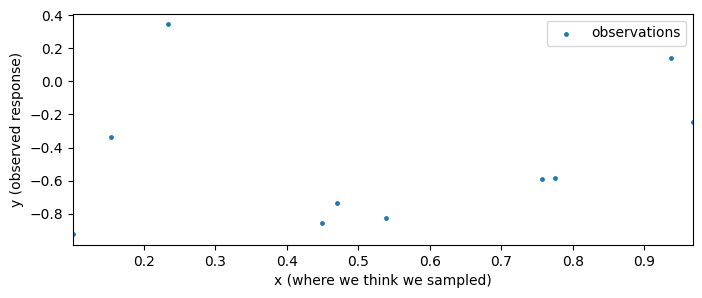

In [12]:
# define a set of points we want to observe the function
x_meas = np.random.rand((10))

# noisily observe the function
y_obs = observe_noisy(f_target, x_meas)

# plot the results
fig, ax = plt.subplots(figsize=(8,3))
# ax.plot(x, y, label="target", alpha=0.25) # <-- feel free to uncomment
ax.scatter(x_meas, y_obs, s=6, label="observations")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")
ax.set_xlabel("x (where we think we sampled)")
ax.set_ylabel("y (observed response)")

Assuming we don’t have access to the true function $f^{*}$, it can be extremely difficult to form a hypothesis about what kind of function might have generated a dataset — especially when the observations are sparse. From a visual standpoint, attempting to fit a curve through a handful of points can lead to wildly different interpretations depending on the assumptions we make. Lets try to sample the dataset more densely and potentially more accurately.

Text(0, 0.5, 'y')

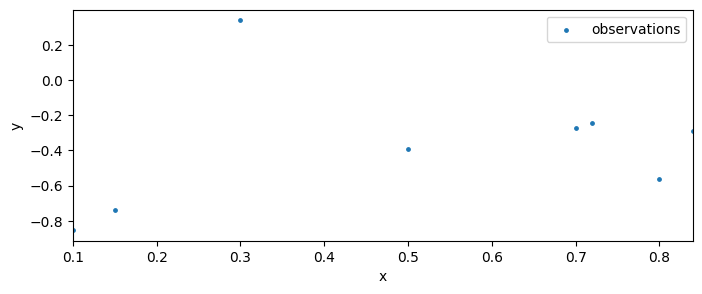

In [13]:
# noise observation process <-- improve this
def observe_noisy(f, x):
    # we often can't sample perfectly a point in the domain perfectly
    x_noise = np.random.normal(0.15, 0.01, x.shape[0]) # <-- vary the mean/std and see what happens
    x_measure = x + x_noise

    # we often can't measure the result perfectly
    y_noise = np.random.normal(-0.13, 0.16, x.shape[0]) # <-- vary the mean/std of the observation noise and see what happens
    y_obs = f(x_measure) + y_noise

    return y_obs

# define a set of points we want to observe the function
x_meas = np.array([0.1, 0.15, 0.3, 0.5, 0.7, 0.72, 0.8, 0.84]) # <-- explore some different measurement points and potentially more
y_obs = observe_noisy(f_target, x_meas)

# plot the results
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="observations")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("y")

Each observation provides a constraint on the behaviour of the function $f^{*}$ at a specific point in the input space $\mathcal{X}$, by revealing what output it maps to $\mathcal{Y}$. Collectively the dataset $\mathcal{D}$ constrains the parameters of our model $f_{\theta}$. We might find no suitable parameters fit our data well - we would then need to go back designing a more suitable hypothesis space $\mathcal{H}$.

See if you can find a good parameterization purely based on the observations.

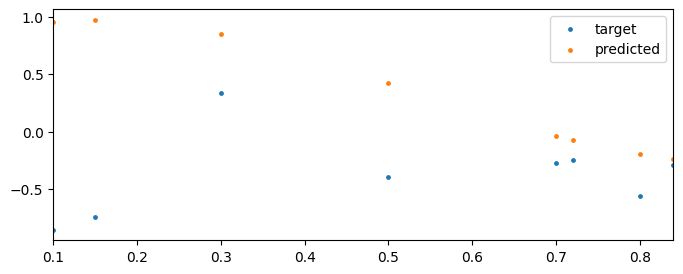

In [15]:
# select a suitable parameterization 
f_approx = H(tau=1, phi=1) # <-- vary the parameterization

# get our predictions
y_pred = f_approx(x_meas)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="target")
ax.scatter(x_meas, y_pred, s=6, label="predicted")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")

As you're going through this manual optimization process it's good to notice that you're relying on your observations $\mathcal{D}$ to constrain $f_{\theta}$ - this is more or less the process of learning - constraining your model using evidence. This forces us to ask whether $\mathcal{D}$ is sufficient to capture and accurately represent the relevant features of $f^{*}$. This discussion on how sufficiently and accurately we resolve the data manifold is a crucial aspect of machine learning - in approximation theory e.g. polynomial interpolation, error bounds of the function approximation often depend on the maximum spacing between samples:

\begin{align*}
    \epsilon \propto \delta^{k} \cdot || f^{(k)} ||_{\infty}, \quad 
    \delta = max_{i}(\mathcal{X}_{i+1} - \mathcal{X}_{i}) \tag{2.4}
\end{align*}

where:
- $\epsilon$ is the error bound
- $f^{(k)}$ is the $k$-th derivative of a function $f$
- $\delta$ is the largest distance between points

Where a functions value changes rapidly (high $f^{(k)}$) to make sure we can constrain our function (minimize $\epsilon$) we need to sample the points more densely around this area of change (minimize $\delta$).

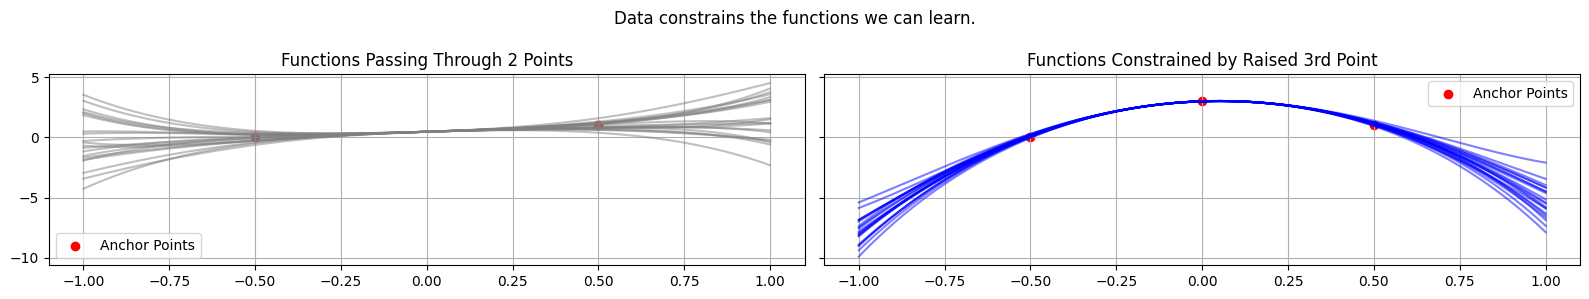

In [20]:
# fefine a domain and anchor points
x = np.linspace(-1, 1, 200)
x2 = np.array([-0.5, 0.5])
y2 = np.array([0.0, 1.0])

# generate a set of functions that fit exactly through the 2 points
functions_2pts = []
for _ in range(20):
    coeffs = np.random.randn(6)
    A = np.vstack([x2**i for i in range(6)]).T
    correction = np.linalg.lstsq(A, y2, rcond=None)[0]
    coeffs[:2] = correction[:2]
    functions_2pts.append(np.poly1d(coeffs[::-1]))

# add a third point
x3 = np.append(x2, [0.0])
y3 = np.append(y2, [3.0])  # raise the third point significantly

# generate functions that fit all 3 points
functions_3pts_high = []
for _ in range(20):
    coeffs = np.random.randn(6)
    A = np.vstack([x3**i for i in range(6)]).T
    correction = np.linalg.lstsq(A, y3, rcond=None)[0]
    coeffs[:3] = correction[:3]
    functions_3pts_high.append(np.poly1d(coeffs[::-1]))

# plot the functions
fig, axs = plt.subplots(1, 2, figsize=(16, 3), sharey=True)

# plot functions through 2 points
axs[0].set_title("Functions Passing Through 2 Points")
for f in functions_2pts:
    axs[0].plot(x, f(x), color='gray', alpha=0.5)
axs[0].scatter(x2, y2, color='red', label='Anchor Points')
axs[0].legend()
axs[0].grid(True)

# plot functions through 3 points (with raised 3rd point)
axs[1].set_title("Functions Constrained by Raised 3rd Point")
for f in functions_3pts_high:
    axs[1].plot(x, f(x), color='blue', alpha=0.5)
axs[1].scatter(x3, y3, color='red', label='Anchor Points')
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Data constrains the functions we can learn.")
plt.tight_layout()
plt.show()

We can see that data is required to resolve the behaviour of the target function $f^{*}$ and ensure suitable interpolation - this is what it means to generalize - to accurately interpolate and extrapolate to points not in your training distribution.

💬 *Question for the audience! Does your dataset accurately reflect your target function? A good way to interrogate this is by considering where your model performs poorly.*

However, this process of fitting functions by hand isn't a particularly rigorous approach - what does it mean for your parameterization to be a good fit?

<h3>
    🎯 Section 2C. Evaluating the fit of our function
</h3>

We need a way to measure how well our function $f_{\theta}$ performs compared to $f^{*}$ to guide our parameterization $\theta \in \Theta$ - we don't have access to $f^{*}$ directly. However, we do have observations of $f^{*}$ as represented by $\mathcal{D}$. We can instead compare how well our function $f$ evaluated at a point $\mathcal{X}_{i}$ predicts the observations $\mathcal{Y}_{i}$.

\begin{align*}
    \hat{\mathcal{Y}}_i = f_\theta(\mathcal{X}_i) \tag{2.6}
\end{align*}

By comparing $\hat{\mathcal{Y}}_i$ with the observations $\mathcal{Y}_{i}$ we can compute an empirical approximation of the true error as defined by the observations:

\begin{align*}
    \mathcal{L}(\mathcal{D}, f_\theta) = \frac{1}{n} \sum_{i=1}^{n} \ell\left(\hat{y}_{i}, y_i\right) = \frac{1}{n} \sum_{i=1}^{n} \ell\left(f_\theta(x_i), y_i\right) \tag{2.7}
\end{align*}

where:
- $\ell(\cdot, \cdot)$ is a pointwise loss function, such as the mean squared error $(\hat{\mathcal{Y}}_i - \mathcal{Y}_{i})^{2}$
- $\mathcal{L}$ is the average loss over the dataset $\mathcal{D}$.

This loss value $\mathcal{L}$ provides feedback about how good our parameterization $f_{\theta}$ is, based on the evidence $\mathcal{D}$. There are numerous ways to define the pointwise loss function $\ell$, each reflecting different assumptions, goals, or properties of the task and this also has implications for the learning process as we'll see. Lets see how we could implement an example below:

💬 *Question for the audience! What loss functions have you used before? Have you used a different loss function and seen a significant difference in model behaviour?*

1. Lets first define the pointwise loss $\ell(\cdot, \cdot)$

In [21]:
print(f"f_approx({x_meas[0]}) = {f_approx(x_meas[0]):.2f}")
print(f"f_target({x_meas[0]}) = {y_obs[0]:.2f}")

print(f"distance between {f_approx(x_meas[0]):.2f} and {y_obs[0]:.2f} = ...")

f_approx(0.1) = 0.96
f_target(0.1) = -0.85
distance between 0.96 and -0.85 = ...


In [22]:
# lets define a pointwise loss function
def pointwise_mse_loss(y, y_hat):
    """
    mean squared error (MSE)
    """
    return (y_hat - y) ** 2

L = pointwise_mse_loss(y_obs[0], f_approx(x_meas[0]))
print(f"mse loss between target {y_obs[0]:.2f} and predicted {f_approx(x_meas[0]):.2f} is {L:.5f}")

mse loss between target -0.85 and predicted 0.96 is 3.28101


2. We can then compute the average loss across the entire dataset $\frac{1}{n} \sum_{i=1}^{n} \ell\left(f_\theta(x_i), y_i\right)$:

In [23]:
# lets define a function that computes the average loss across a dataset
def compute_dataset_loss(f, x, y, loss_fn):
    # compute predictions
    y_hat = f(x)

    # number of samples
    N = y.shape[0]

    # accumulate loss across samples
    L = 0
    for i in range(N):
        L += loss_fn(y[i], y_hat[i])

    # compute average loss
    L = (1/N) * L

    return float(L)

# lets compute the average mse loss across the dataset for our function
L_D = compute_dataset_loss(f_approx, x_meas, y_obs, pointwise_mse_loss)
print(f"L_D = {L_D:.3f}")

L_D = 0.920


<h3>🏞️ Section 2D. The Loss Landscape</h3>

We can now empirically compute how well our model $f_{\theta}$ fits the dataset $\mathcal{D}$ using through $\mathcal{L}(\mathcal{D}, f_\theta)$. Crucially, we observe that the loss function $\mathcal{L}(\mathcal{D}, f_\theta)$ is a function over the data and parameter space. We can see that a given dataset will restrict the set of parameters we can learn - in essense the evidence contained in the dataset restricts the subset of hypothesis space we can learn.

This leads to a fundamental source of error in machine learning - generalization error $\epsilon_{gen}$. The generalization error represents the error between the best possible function constricted by the hypothesis space and dataset $\hat{f}$ and the target function $f^{*}$. Formally, we define the empirical-risk minimiser $\hat{f}$ as the function in our hypothesis space $\mathcal{H}$ that best fits the training data $\mathcal{D}$:

\begin{align*}
    \hat{f} = \text{argmin}_{f_{\theta} \in \mathcal{H}} \mathcal{L}(\mathcal{D}, f_\theta) \tag{2.8}
\end{align*}

💬 *Question for the audience: How well does your dataset represent the target function - what aspects does it not capture properly - does this limit generalization?*

For a given dataset $\mathcal{D}$ we can view the loss function as a function of the parameters of our function.

\begin{align*}
    \mathcal{L}(\theta) = \frac{1}{n} \sum_{i=1}^{n} ((e^{-x^{2}} \cdot \sin(2 \pi \theta_{0} x + \theta_{1})) - y_i)^{2} \tag{2.9}
\end{align*}

Let's explore how the loss value varies with the parameters.

Text(0.5, 1.0, 'Loss Landscape')

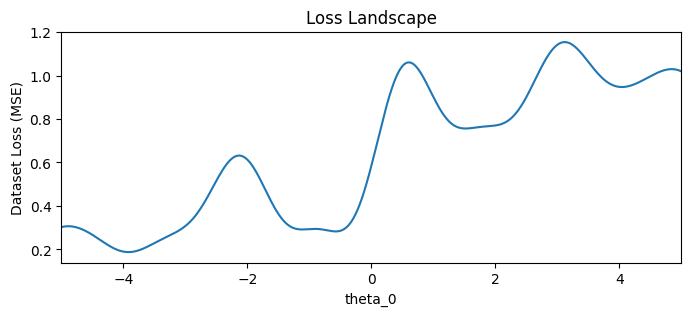

In [25]:
# lets consider a single parameter
theta_0 = np.linspace(-5, 5, num=1000) # <-- is this a suitable range for the parameter?
theta_1 = 0.41

# lets compute the loss (error across the dataset) for each function defined by the parameter
losses = np.zeros_like(theta_0)
for i in range(theta_0.shape[0]):
    # select a function from the hypothesis space - each point in parameter space is a function
    f_approx = H(tau=theta_0[i], phi=theta_1)

    # perform predictions based on dataset
    y_pred = f_approx(x_meas)

    # compute loss across dataset
    losses[i] = compute_dataset_loss(f_approx, x_meas, y_obs, pointwise_mse_loss)

# lets plot the result
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(theta_0, losses)
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_xlabel("theta_0")
ax.set_ylabel("Dataset Loss (MSE)")
ax.set_title(f"Loss Landscape")

We know the actual parameters of the function are given by:

\begin{align*}
    \theta_{0} = 5.8, \quad \theta_{1} = 0.41
\end{align*}

So how well does this align with our expectations?

minimum loss L=0.187 occurs at theta_0=-3.919 for theta_1=0.41


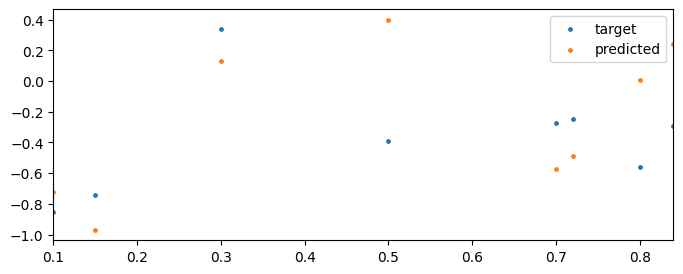

In [ ]:
# where is it minimum?
min_idx = np.argmin(losses)
print(f"minimum loss L={losses[min_idx]:.3f} occurs at theta_0={theta_0[min_idx]:.3f} for theta_1={theta_1}")

# lets see what this parameterization looks like
f_approx = H(tau=theta_0[min_idx], phi=theta_1)
y_pred = f_approx(x_meas)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="target")
ax.scatter(x_meas, y_pred, s=6, label="predicted")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")

# share your results in the chat!

We can see thaty we've fit the training distribution well, however didn't we expect to obtain $\theta_{0} = 5.8$? If we were careful we might notice there is a systematic bias in how we've collected the data which has significantly changed the function we measure and thus what we can learn. Or we might have found a different solution given the periodicity of this function. Post your plots in the chat and we can discuss.

Okay, to find this "best" $\theta_{0}$ we had to assume a well-known $\theta_{1}$. Lets relax this assumption by extending th visualization of the loss landscape to two dimensions and see how it varies as a function of both parameters.

Text(0.5, 1.0, 'Loss Landscape (Top-down View)')

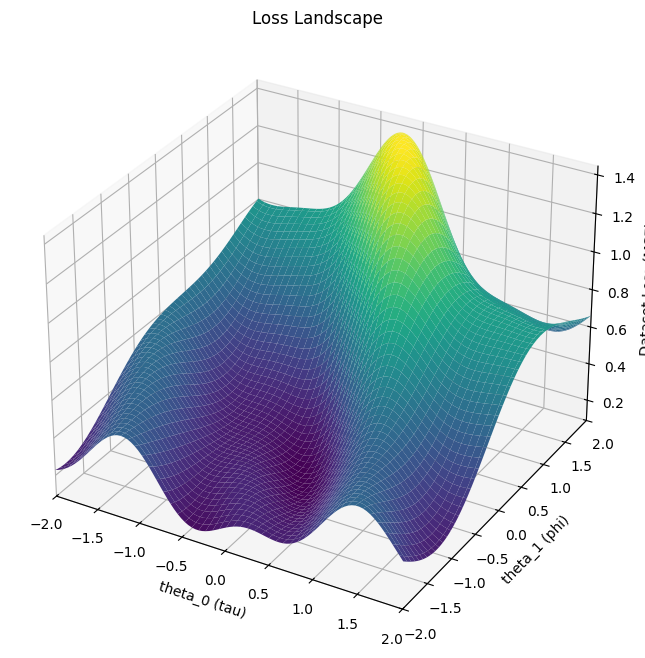

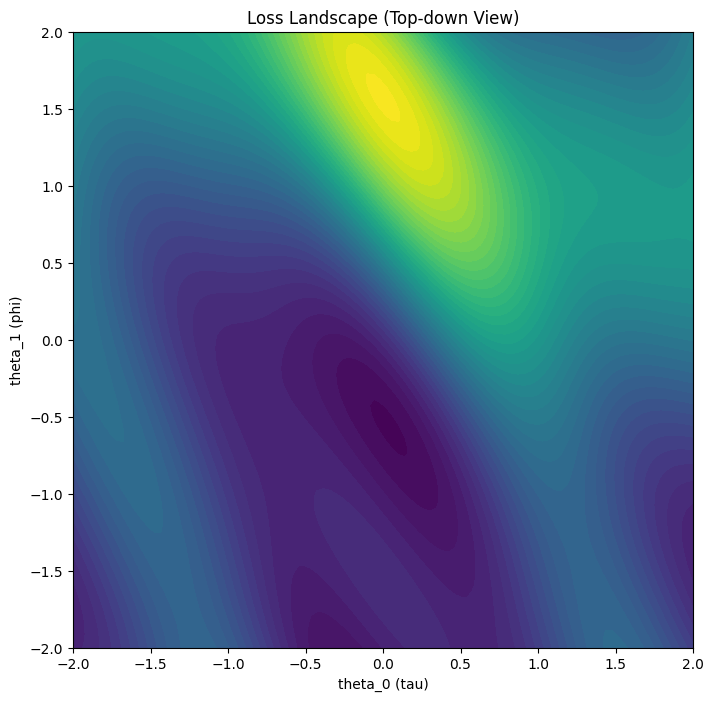

In [36]:
# lets consider a single parameter
theta_0 = np.linspace(-2, 2, num=100) # <-- explore a different range, does [-5,5] let you find the optimal solution?
theta_1 = np.linspace(-2, 2, num=100)
T0, T1 = np.meshgrid(theta_0, theta_1, indexing="ij")

# lets compute the loss (error across the dataset) for each function defined by the parameter
losses = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T1.shape[0]):
        # select a function from the hypothesis space
        f_approx = H(tau=T0[i,j], phi=T1[i,j])

        # compute loss across dataset
        losses[i,j] = compute_dataset_loss(f_approx, x_meas, y_obs, pointwise_mse_loss)
        

# lets plot the result
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
s = ax.plot_surface(T0, T1, losses, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_zlabel("Dataset Loss (MSE)")
ax.set_title(f"Loss Landscape")

# as a contour plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_title(f"Loss Landscape (Top-down View)")

Please post your loss landscape in the chat? How does it vary as you vary the dataset? What about the loss function?

minimum loss L=0.115 occurs at theta_0=0.020 for theta_1=-0.545


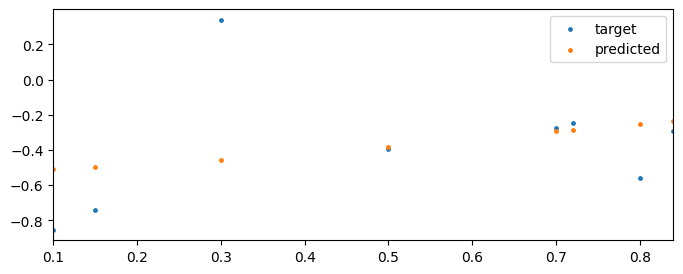

In [37]:
# where is it minimum?
t0_min_idx, t1_min_idx = np.unravel_index(np.argmin(losses), losses.shape)
print(f"minimum loss L={losses[t0_min_idx,t1_min_idx]:.3f} occurs at theta_0={theta_0[t0_min_idx]:.3f} for theta_1={theta_1[t1_min_idx]:.3f}")

# lets see what this parameterization looks like
f_approx = H(tau=theta_0[t0_min_idx], phi=theta_1[t1_min_idx])
y_pred = f_approx(x_meas)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="target")
ax.scatter(x_meas, y_pred, s=6, label="predicted")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")

We can view our function as being at a specific point in this space defined:

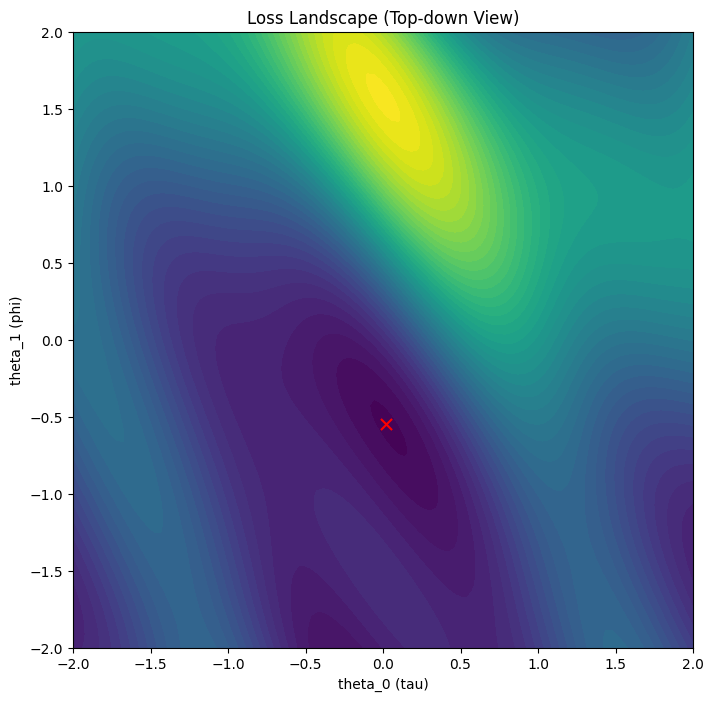

In [38]:
# as a contour plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_title(f"Loss Landscape (Top-down View)")

# plot our function in parameter space
tau=theta_0[t0_min_idx]
phi=theta_1[t1_min_idx]
ax.scatter(tau, phi, s=64, marker="x", color="red")

While we can't properly visualize spaces with more than three dimensions in our universe - viewing the loss landscape as a geometric surface is a powerful way to think about learning. Low points (minima) represent good solutions (low loss) and high points (maxima) represent poor solutions (high loss). The loss landscape is a geometric object that encodes the structure of the learning problem - linking together the dataset, model, and eventually the optimization procedure. Understanding its shape helps us reason about trainability, sensitivty of the model to initialization, and the nature of solutions.

<h2>
    Section 3. Optimization - The Learning in Machine Learing 
</h2>

So to summarize where we're at:
1. We have chosen a hypothesis space $\mathcal{H}$.
2. We have collected a dataset $\mathcal{D}$.
3. We have defined a loss function $\mathcal{L}(f_\theta(x), \mathcal{D})$ that we can visualize to find a good solution.

We're viewing this as an optimization problems where we're aiming to explore $\mathcal{H}$ - varying $\theta$ to minimize $\mathcal{L}(f_\theta(x), \mathcal{D})$:

\begin{align*}
\theta^* = \arg\min_\theta \mathcal{L}(f_\theta(x), y) \tag{3.1}
\end{align*}


So what happens when the loss landscape becomes higher dimensional and we can visualize it? What if it's simply too computationally costly to evaluate the loss landscape? We need a better way to navigate this landscape. While there are lots of different techniques to perform optimization such as evolutionary algorithms - it turns out our best current approach is to blindly feel our way across the surface - this process is called gradient descent.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GradientDescent.png" height="400"/>
    <p><em>Figure 4. Gradient descent is an optimization algorithm used to iteratively adjust model parameters in the direction that most reduces the loss function.
 </em></p>
</div>

<h3>Section 3A. Gradient Descent</h3>

Gradient descent is one of the most widely used optimization algorithms in machine learning. Gradient descent is an iterative method that uses the gradient (a vector indicating the slope of the loss surface at a point) to determine the direction of steepest descent, and updates model parameters in the direction to minimize the loss:

\begin{align*}
\theta := \theta - \eta \cdot \nabla_\theta \mathcal{L}(f_\theta(x), y) \tag{3.2}
\end{align*}

where:
- $\nabla_\theta \mathcal{L}$ is the gradient of the loss w.r.t. parameters.
- $\eta$ is the learning rate - the size of our step.

Imagine standing blindfolded in a mountainous landscape — this is your loss landscape. You can’t see the terrain, but you’re trying to reach the lowest valley (the global minimum). To do this, you feel the slope around your feet — this is like computing the local gradient. Based on this local information, you take a small step downhill. Then you repeat: feel, step, repeat. That’s gradient descent — a blind but guided walk through parameter space, steadily improving the model with each step.

So how do we compute and apply the gradient? Calculus.

Our loss function is defined as:

\begin{align*}
\mathcal{L}(\theta) 
= \frac{1}{n} \sum_{i=1}^{n} \left( f_\theta(x_i) - y_i \right)^2  \tag{3.2}
\end{align*}

Our goal is to compute the gradient in the direction of each parameter (direction on the loss landscape):

\begin{align*}
\nabla_\theta \mathcal{L}(\theta) = (\frac{\partial \mathcal{L}}{\partial \theta_0}, \frac{\partial \mathcal{L}}{\partial \theta_1}) \tag{3.4}
\end{align*}

The chain rule allows us to decompose the loss derivative into the product of:
- The derivative of the loss with respect to the model output (error),
- And the derivative of the model output with respect to the parameter.

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \theta_0} 
= \frac{\partial \mathcal{L}}{\partial f_\theta(x_i)} \cdot \frac{\partial f_\theta(x_i)}{\partial \theta_0} 
= \frac{1}{n} \sum 2(f_\theta(x_i) - y_i) \cdot \frac{\partial f_\theta(x_i)}{\partial \theta_0} \tag{3.6}
\end{align*}

We can then differentiate the model function with respect to $\theta_0$:

\begin{align*}
\frac{\partial f_\theta(x_i)}{\partial \theta_0}
= \frac{\partial}{\partial \theta_0} \left[ e^{-x_i^2} \cdot \sin(\theta_0 \pi x_i + \theta_1) \right]
= e^{-x_i^2} \cdot \cos(\theta_0 \pi x_i + \theta_1) \cdot \pi x_i \tag{3.7}
\end{align*}

Putting it all together:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \theta_0}
= \frac{2}{n} \sum (f_\theta(x_i) - y_i) \cdot e^{-x_i^2} \cdot \cos(\theta_0 \pi x_i + \varphi) \cdot \pi x_i \tag{3.8}
\end{align*}

Then we repeat the same process for every single parameter in our model. This lets us efficiently compute how changes in parameters influence the overall loss, and is the mechanism used in frameworks like PyTorch and TensorFlow during automatic differentiation.

In [39]:
# we can compute the derivatives of our function
def df_dtau(x, tau, phi):
    return 2 * np.pi * x * np.exp(-x**2) * np.cos(2 * np.pi * tau * x + phi)

def df_dphi(x, tau, phi):
    return np.exp(-x**2) * np.cos(2 * np.pi * tau * x + phi)


# and compute the derivative of the loss wrt to our function
def grad_mse_tau_phi(x, y, tau, phi):
    y_pred = H(tau, phi)(x)
    error = y_pred - y

    dL_dtau = 2 * np.mean(error * df_dtau(x, tau, phi))
    dL_dphi = 2 * np.mean(error * df_dphi(x, tau, phi))

    return dL_dtau, dL_dphi

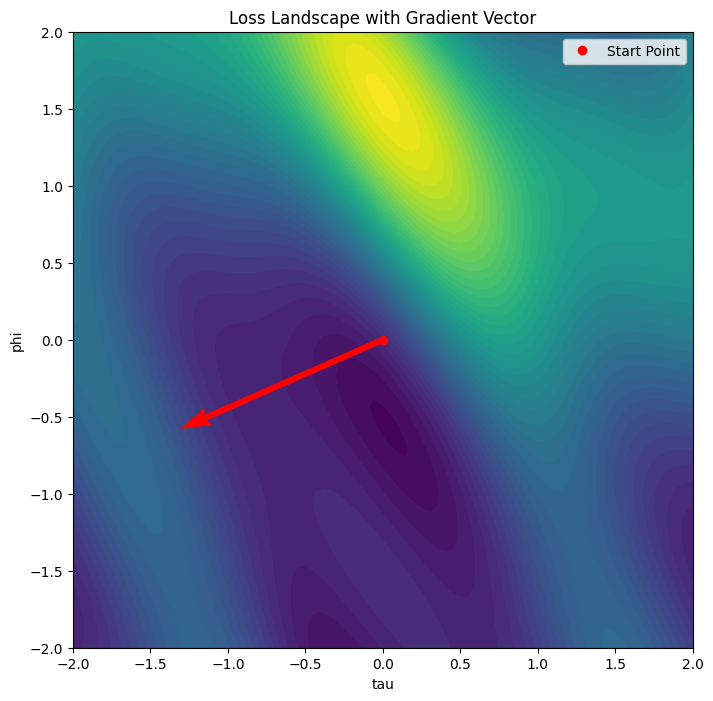

In [41]:
# lets setup a grid of parameters
theta_0 = np.linspace(-2, 2, num=100)  # <-- explore a different range of parameter values ; trade-off of coverage vs. resolution
theta_1 = np.linspace(-2, 2, num=100) 
T0, T1 = np.meshgrid(theta_0, theta_1, indexing="ij")

# lets compute the loss at each point of the grid (for visualization)
losses = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        _f = H(tau=T0[i, j], phi=T1[i, j])
        losses[i, j] = compute_dataset_loss(_f, x_meas, y_obs, pointwise_mse_loss)

# 1. define the parameter values
tau, phi = 0., 0. # <-- explore different points in the landscape and see how the gradient varies

# 2. compute the gradient of the loss with respect to each parameter - \nalba_{theta}
dL_dtau, dL_dphi = grad_mse_tau_phi(x_meas, y_obs, tau, phi)

# 3.  scale the gradient by a step size
lr = 1.00
dL_dtau = -lr * dL_dtau
dL_dphi = -lr * dL_dphi

# plot contour and gradient vector
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(T0.min(), T0.max())
ax.set_ylim(T1.min(), T1.max())
ax.set_xlabel("tau")
ax.set_ylabel("phi")
ax.set_title("Loss Landscape with Gradient Vector")
ax.quiver(tau, phi, dL_dtau, dL_dphi, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax.plot(tau, phi, 'ro', label="Start Point")
ax.legend()

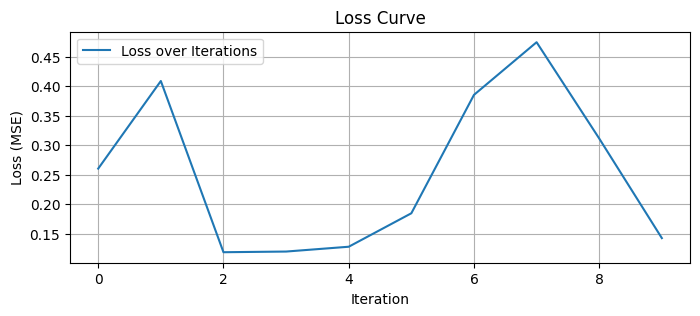

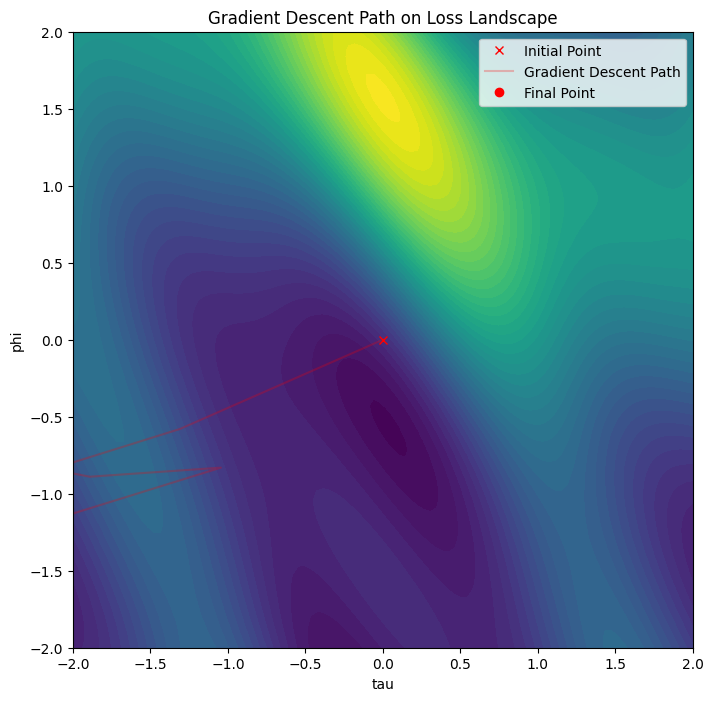

In [46]:
def gradient_descent_traj(tau_init, phi_init, x, y, lr, steps):
    tau, phi = tau_init, phi_init
    history = []

    for _ in range(steps):
        # define model and compute error
        f_approx = H(tau, phi)
        y_pred = f_approx(x)
        error = y_pred - y

        # compute gradients using known partial derivatives
        grad_tau = 2 * np.mean(error * df_dtau(x, tau, phi))
        grad_phi = 2 * np.mean(error * df_dphi(x, tau, phi))

        # store history before update
        loss = np.mean((y - y_pred)**2)
        history.append((tau, phi, loss))

        # gradient descent update
        tau -= lr * grad_tau
        phi -= lr * grad_phi

    return np.array(history)

# Run gradient descent
trajectory = gradient_descent_traj(tau_init=.0, phi_init=.0, x=x_meas, y=y_obs, lr=1.00, steps=10) # <-- vary the initial point, the learning rate, and the step size : how do these impact the solution you find?

# Plot loss over iterations
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(trajectory[:, 2], label="Loss over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss (MSE)")
ax.set_title("Loss Curve")
ax.grid(True)
ax.legend()

# Plot the path on the loss landscape
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(T0.min(), T0.max())
ax.set_ylim(T1.min(), T1.max())
ax.set_xlabel("tau")
ax.set_ylabel("phi")
ax.set_title("Gradient Descent Path on Loss Landscape")

# Path
ax.plot(trajectory[0, 0], trajectory[0, 1], 'rx', label="Initial Point")
ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-', alpha=0.25, label="Gradient Descent Path")
ax.plot(trajectory[-1, 0], trajectory[-1, 1], 'ro', label="Final Point")
ax.legend()

our optimized model f_tilde has theta0=-2.644 and theta1=-1.330


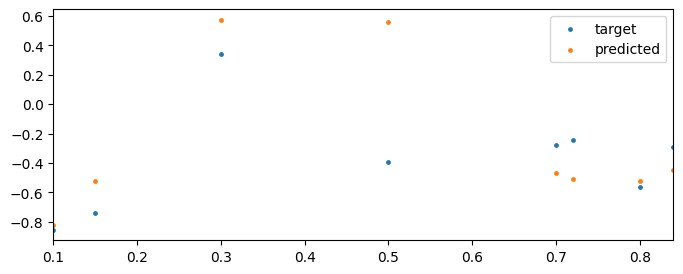

In [47]:
# optimized model
final_tau, final_phi = tuple(trajectory[-1,:2].tolist())
f_tilde = H(final_tau, final_phi)
print(f"our optimized model f_tilde has theta0={final_tau:.3f} and theta1={final_phi:.3f}")

# lets visualize it
y_pred = f_tilde(x_meas)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="target")
ax.scatter(x_meas, y_pred, s=6, label="predicted")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")

We refer to the model with the set of parameters determined by the optimization process as $\tilde{f}$.

This leads to another fundamental source of error in machine learning, the optimization error, $\epsilon_{opt}$. The optimization error error represents the error between $\hat{f}$ (best possible model your hypothesis space could express based on the data) and $\tilde{f}$ (the model your optimization algorithm actually found), in essense the error as a result of the imperfect optimization process. Even when the hypothesis space $\mathcal{H}$ is expressive enough to represent a good approximation of the true function, you may not reach that optimum during training. This happens due to:
- Poor initialization: Your starting point in parameter space may be far from the optimum.
- Learning rate issues: If your learning rate is too high, you may overshoot the minimum. If too low, training may stagnate.
- Early stopping: Optimization may be halted before convergence due to computational limits or regularization strategies.
- Local minima or saddle points: In non-convex landscapes, the optimizer may get trapped in regions that are suboptimal.
- Noisy or stochastic gradients: In mini-batch training, variance in gradient estimates can lead to imperfect updates.


---

<h2>🧠 Workshop Summary: What Have We Learned?</h2>

Over the course of this workshop, we’ve taken a step back from just "using machine learning models" and instead focused on building a deeper understanding of how learning works — and why. Whilst this first workshop was very theory heavy - we're going to revisit and reinforce some of these concepts throughout the next set of workshops - hopefully this provides some good intuition for the future.


<h3>🔁 1. Machine Learning is About Learning Functions</h3>

We reframed machine learning as the task of approximate an unknown function $f^*$ that maps inputs to outputs:
\begin{align*}
    f^*: \mathcal{X} \rightarrow \mathcal{Y}
\end{align*}

Since we rarely know $f^*$ directly, we observe data $\mathcal{D}$ — noisy samples of its behavior — and attempt to learn an approximation $f_\theta$ that generalizes well.

<h3>📐 2. We Define a Hypothesis Space</h3>

We choose a hypothesis space $\mathcal{H}$: the family of functions we’re willing to consider. This reflects our assumptions and modeling choices — linear functions, neural nets, polynomials, etc.


<h3>🎯 3. We Use Data to Constrain the Hypothesis Space</h3>

Each observation in $\mathcal{D}$ acts as a constraint on what $f^*$ might be. The dataset, function, and loss function defines a surface over parameter space, and training means searching this surface for a good minimum.

\begin{align*}
    \mathcal{L}(\theta) = \frac{1}{n} \sum \mathcal{L}(f_\theta(x_i), y_i)
\end{align*}

<h3>🔽 4. We Minimize Loss via Optimization</h3>

We explored gradient descent as a method to minimize the loss. We visualized how the landscape behaves, how gradients flow, and how descent leads to improvement — but not always perfection.

<h3>❗ 5. We Encounter Fundamental Errors</h3>

We introduced three core sources of error in machine learning:
- Approximation error: when our model can’t express the true function.
- Generalization error: we dont have enough data to make a reliable estimate.
- Optimization error: our optimizer didn’t find the best possible model.

<h3>🧭 Final Takeaway</h3>

> **Machine learning is about hypothesis, assumptions, constraints - and how we use this to learn a function from data.**

---